# Data Set Visualization Preview
The dataset was sourced from Kaggle through the UCI Machine Learning Repository. The dataset is an analysis of diabetes risk factors via a survey conducted by the CDC. The dataset contains 22 unique columns and is used to study correlations between lifestyle factors and diabetes.

## Data Selection Loading

In [13]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# Read the csv file
diabetes = pd.read_csv('diabetes.csv')

# Separate features and target (exclude 'Diabetes_012')
features = diabetes.drop('Diabetes_012', axis=1)
target = diabetes['Diabetes_012']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Covariance Matrix Heatmap

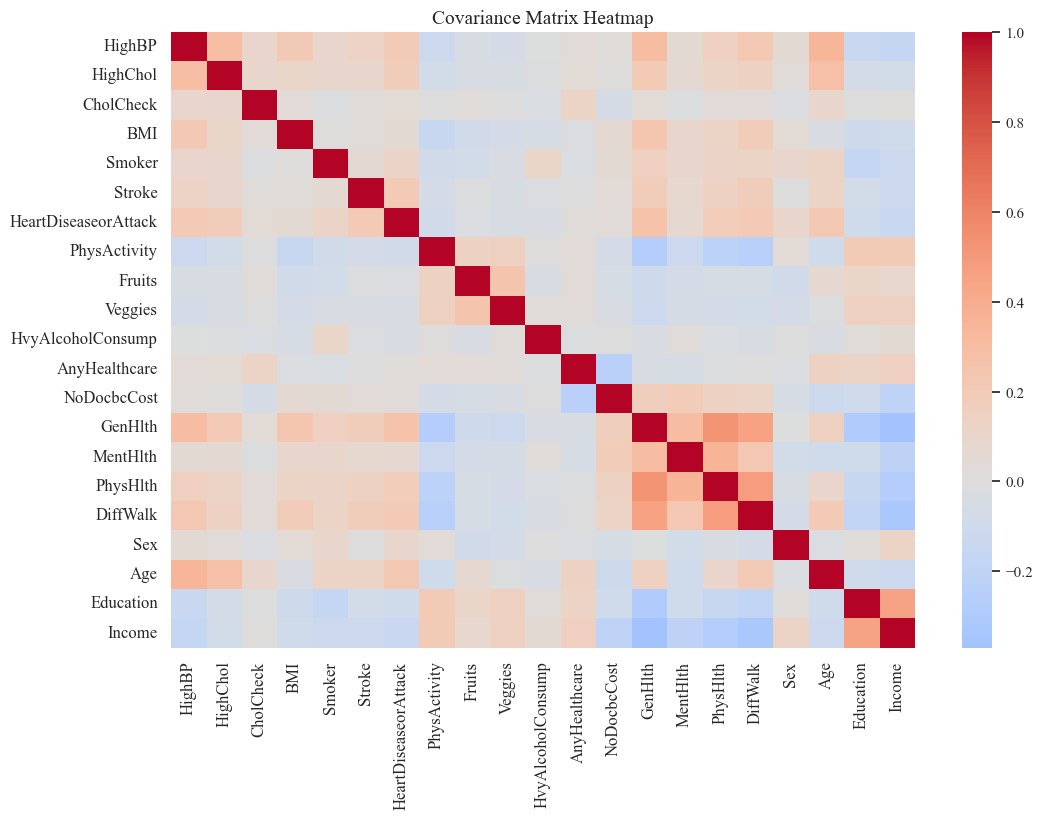

In [71]:
# Compute covariance matrix
cov_matrix = np.cov(scaled_features.T)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.set(font='Times New Roman')
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', center=0,
            xticklabels=features.columns, yticklabels=features.columns)

# Title
plt.title('Covariance Matrix Heatmap', fontdict={'fontname': 'Times New Roman', 'fontsize': 14})

# X and Y Ticks
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

# Save Visualization
plt.savefig('Lab5_Jamie_CovarianceHeatmap.png', dpi=300)
plt.show()

## Visualization Summary
This heatmap shows the correlation between the different attributes. From the visualization we can see a positive covariance between HighBP and HighChol which suggests a shared variance in hypertension/cholesterol patterns. We can also see a negative covariance between PhysActivity and GenHlth, with another being Income and GenHlth. These relationships guide attribute selection for dimensionality reduction.

# Eigenvalues & Eigenvectors Visualization

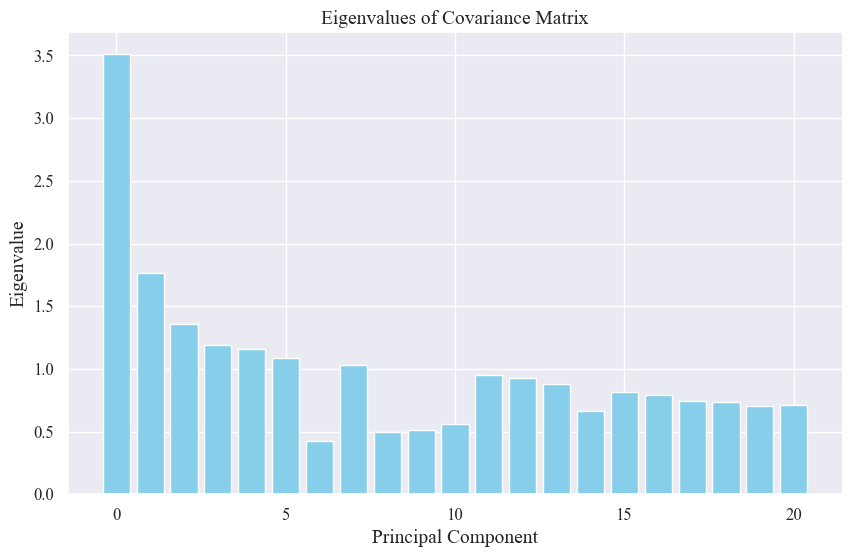

In [75]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.bar(range(len(eigenvalues)), eigenvalues, color='skyblue')

# Title and Labels
plt.title('Eigenvalues of Covariance Matrix', fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
plt.xlabel('Principal Component', fontname='Times New Roman', fontsize=14)
plt.ylabel('Eigenvalue', fontname='Times New Roman', fontsize=14)

# X and Y Ticks
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

# Save Visualization
plt.savefig('Lab5_Jamie_Eigenvalues.png', dpi=300)
plt.show()

## Visualization Summary
The first two egienvalues dominate which is about 50% of the total variance. This highlights the reducibility of the dataset, meaning more information can be captured with very few dimensions. We can see a sharp eigenvalue decay after PC2 which implies diminishing returns for retaining additional components.

# Scree Plot

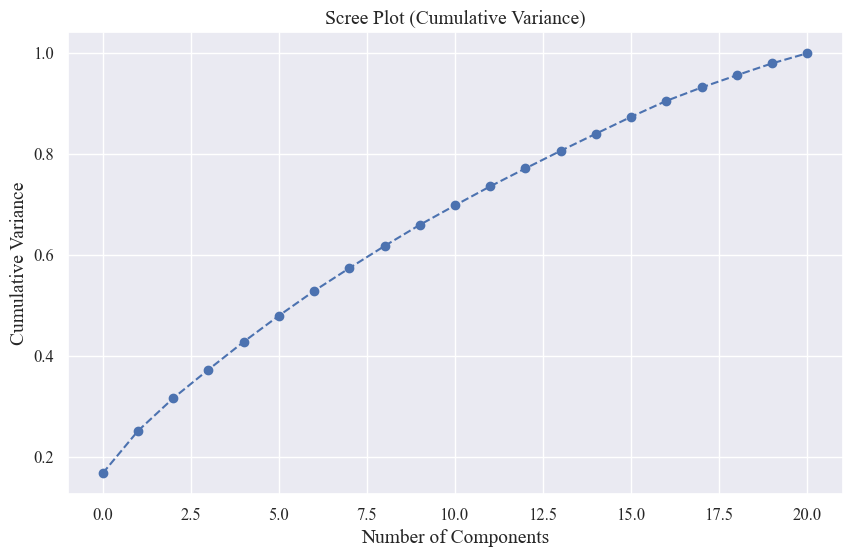

In [78]:
pca = PCA()
pca.fit(scaled_features)
explained_var = pca.explained_variance_ratio_

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_var), marker='o', linestyle='--', color='b')

# Title and Label
plt.title('Scree Plot (Cumulative Variance)', fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
plt.xlabel('Number of Components', fontname='Times New Roman', fontsize=14)
plt.ylabel('Cumulative Variance', fontname='Times New Roman', fontsize=14)

# X and Y Ticks
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)

# Save Visualization
plt.savefig('Lab5_Jamie_ScreePlot.png', dpi=300)
plt.show()

## Visualization Summary
The first three PC's exaplain about 65% cumulative variance, this suggests that 3D projections retain the most structural information. The gradual slope after PC3 implies a trade off between dimensionality reduction and information loss for downstream tasks like clustering.

# 2D Scatterplot

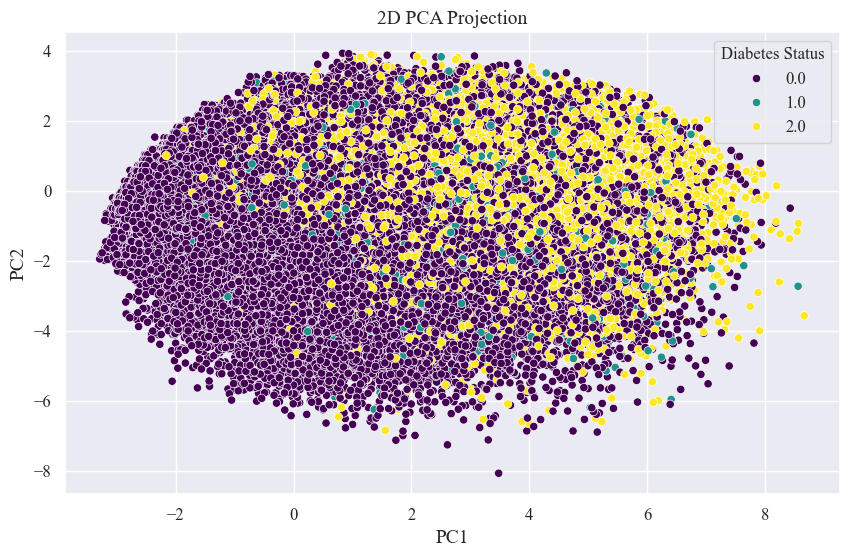

In [86]:
pca_scores = pca.transform(scaled_features)

# Plot Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1], hue=target, palette='viridis')

# Title and Labels
plt.title('2D PCA Projection', fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
plt.xlabel('PC1', fontname='Times New Roman', fontsize=14)
plt.ylabel('PC2', fontname='Times New Roman', fontsize=14)

 # X and Y Ticks
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.legend(title='Diabetes Status', fontsize=12)

# Save Visualization
plt.savefig('Lab5_Jamie_2DScatter.png', dpi=300)
plt.show()

## Visualization Summary
The diabetes dots cluster near the PC1 axis over the PC2 axis which implies that they are influenced by BMI and Age. PC2 is roughly 20% of the variation which helps separate the groups but the overlap is still very prominent. We can see a gradual risk shift as we move along the PC1 axis which implies they are affected by biometric factors. 

# 3D PCA Scatter Plot

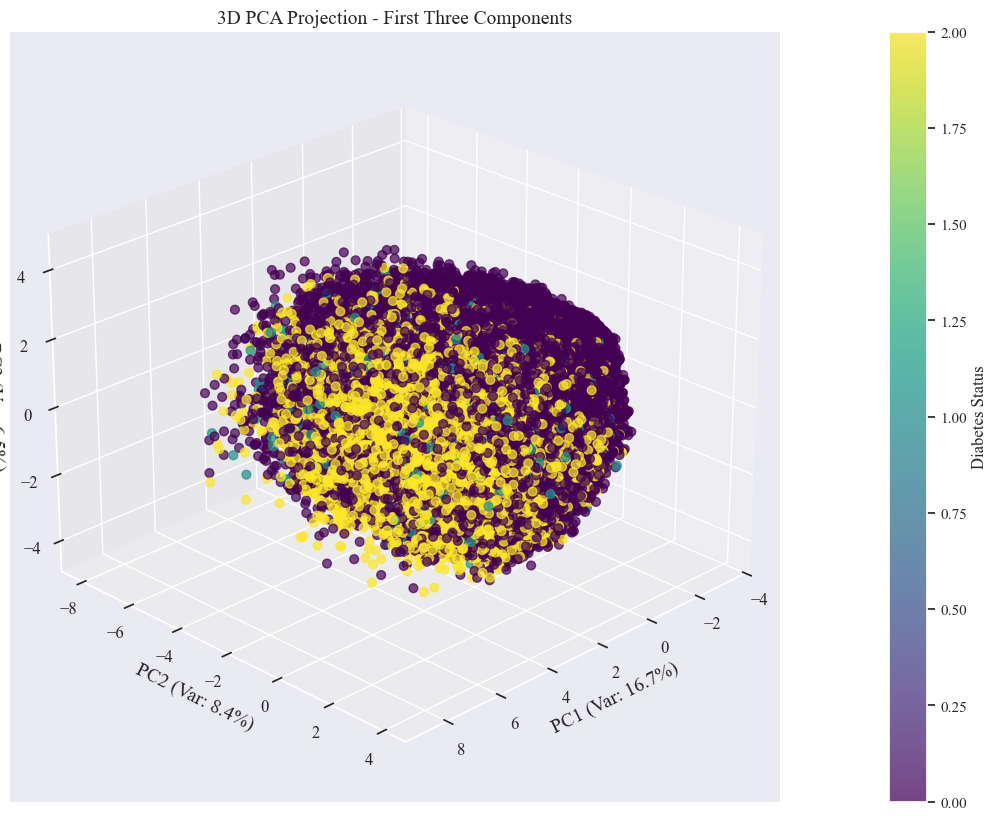

In [81]:
# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot colored by diabetes status
scatter = ax.scatter(
    pca_scores[:, 0],  # PC1
    pca_scores[:, 1],  # PC2
    pca_scores[:, 2],  # PC3
    c=target,          # Color by diabetes status
    cmap='viridis',
    alpha=0.7,
    s=40,
    depthshade=True
)

# Formatting
ax.set_title('3D PCA Projection - First Three Components', 
            fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
ax.set_xlabel('PC1 (Var: {:.1f}%)'.format(explained_var[0]*100), 
             fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
ax.set_ylabel('PC2 (Var: {:.1f}%)'.format(explained_var[1]*100), 
             fontdict={'fontname': 'Times New Roman', 'fontsize': 14})
ax.set_zlabel('PC3 (Var: {:.1f}%)'.format(explained_var[2]*100), 
             fontdict={'fontname': 'Times New Roman', 'fontsize': 14})

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Diabetes Status', 
              fontdict={'fontname': 'Times New Roman', 'fontsize': 12})

# Set viewing angle
ax.view_init(elev=25, azim=45)  

# Set font for all tick labels
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_tick_params(labelsize=12)
    for label in axis.get_ticklabels():
        label.set_fontname('Times New Roman')

# Save Visualization
plt.savefig('Lab5_Jamie_3DScatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

## Visualization Summary
The individuals with diabetes, the yellow dots, cluster towards higher PC1 values, which are influenced by BMI and Age. While PC3 adds very little separation, 3D visualization confirms that the diabetes status is strongly connected to the PC1 direction. The way the data overlaps in simpler dimensions suggests there might be more complex patterns at play, possibly requiring advanced methods to uncover them.